# OASIS INFOBYTE DATA SCIENCE INTERNSHIP 2023

## IRIS FLOWER CLASSIFICATION

In [2]:
import numpy as ns
import pandas as ps
from matplotlib import pyplot as pt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *


In [3]:
sf=ps.read_csv("C:/Users/user/Documents/Iris.csv")


In [8]:
sf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
sf.head(200)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
sf=sf.drop(columns=['Id'])
sf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
sf.shape

(150, 5)

In [12]:
sf.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [13]:
sf.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
sf.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [15]:
sf.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
store=sf.groupby('Species')
store.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [18]:
sf.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [19]:
sf['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [20]:
sf.tail(60)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
90,5.5,2.6,4.4,1.2,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [21]:
sf['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: >

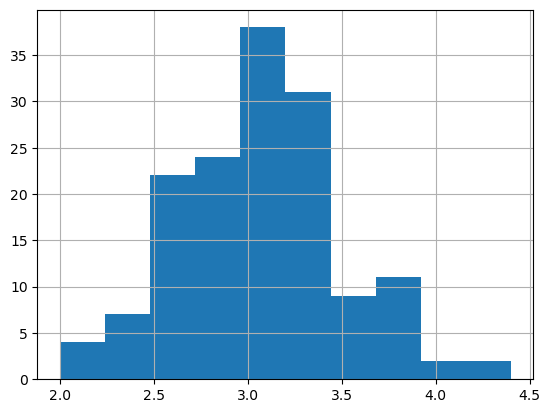

In [22]:
sf['SepalWidthCm'].hist()

<Axes: >

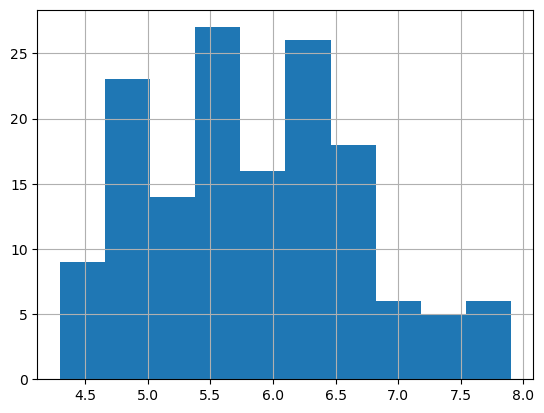

In [23]:
sf['SepalLengthCm'].hist()

<Axes: >

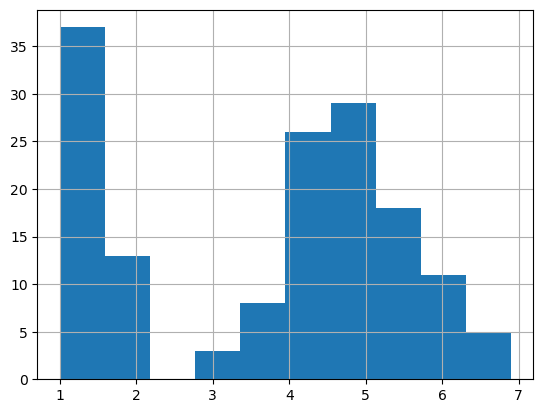

In [24]:
sf['PetalLengthCm'].hist()

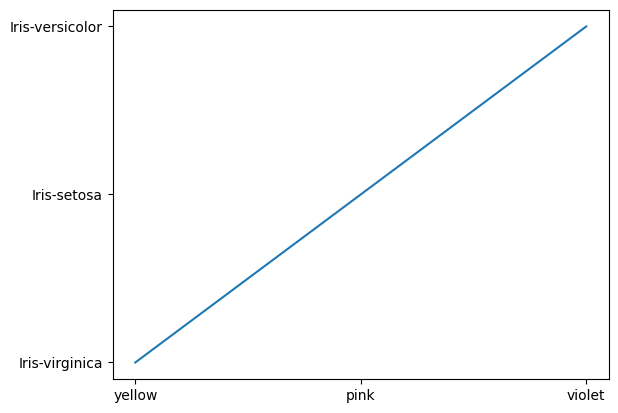

In [29]:
var=['yellow','pink','violet']
species=['Iris-virginica','Iris-setosa','Iris-versicolor']
pt.plot(var,species)

In [30]:
var=['yellow','pink','violet']
species=['Iris-virginica','Iris-setosa','Iris-versicolor']

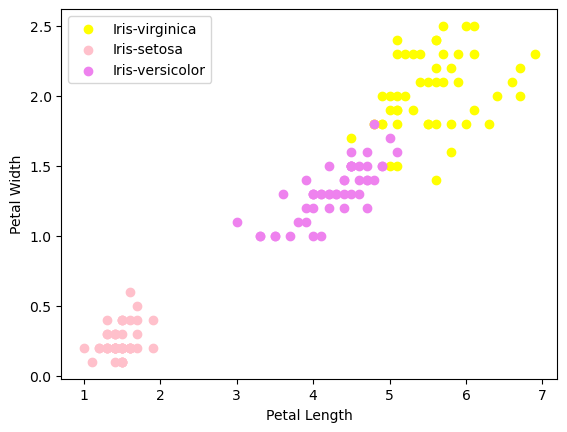

In [32]:
for i in range(3):
    a=sf[sf['Species']==species[i]]
    pt.scatter(a['PetalLengthCm'],a['PetalWidthCm'],c=var[i],label=species[i])
pt.xlabel("Petal Length")
pt.ylabel("Petal Width")
pt.legend()

In [33]:
sf.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_5104\716085385.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sf.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f5589a7a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5589a7f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5589a7760>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5589dc4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5589dc760>],
 'means': []}

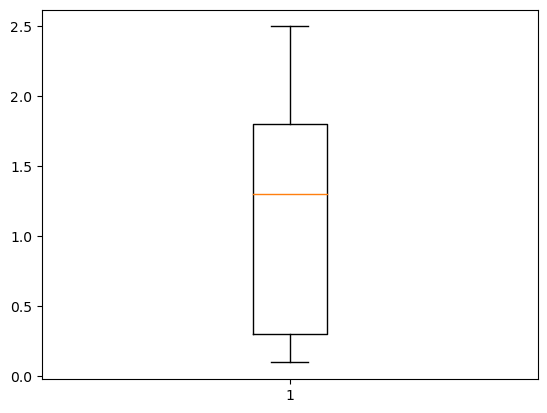

In [34]:
pt.boxplot(sf['PetalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f558caa110>,
 'caps': [<matplotlib.lines.Line2D at 0x1f558caa650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f558ca9e70>],
 'medians': [<matplotlib.lines.Line2D at 0x1f558caab90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f558caae30>],
 'means': []}

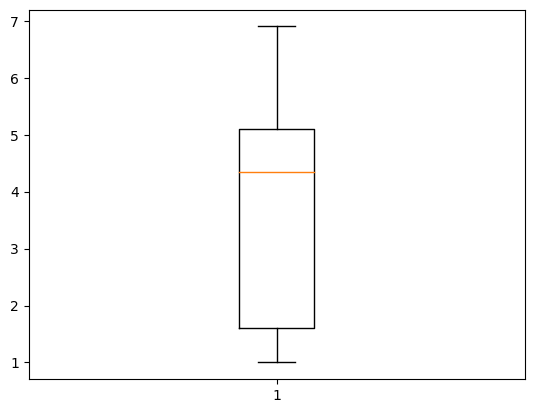

In [35]:
pt.boxplot(sf['PetalLengthCm'])

C:\Users\user\AppData\Local\Temp\ipykernel_5104\2279308901.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(sf.corr(),cmap='cool')


<Axes: >

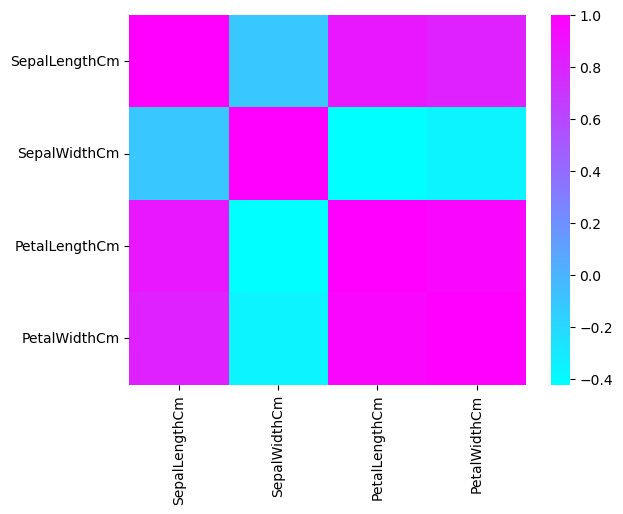

In [36]:
sb.heatmap(sf.corr(),cmap='cool')

In [7]:
a=sf.iloc[:,1:3]

In [8]:
a

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [9]:
b=sf.iloc[:,2]

In [10]:
b

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64

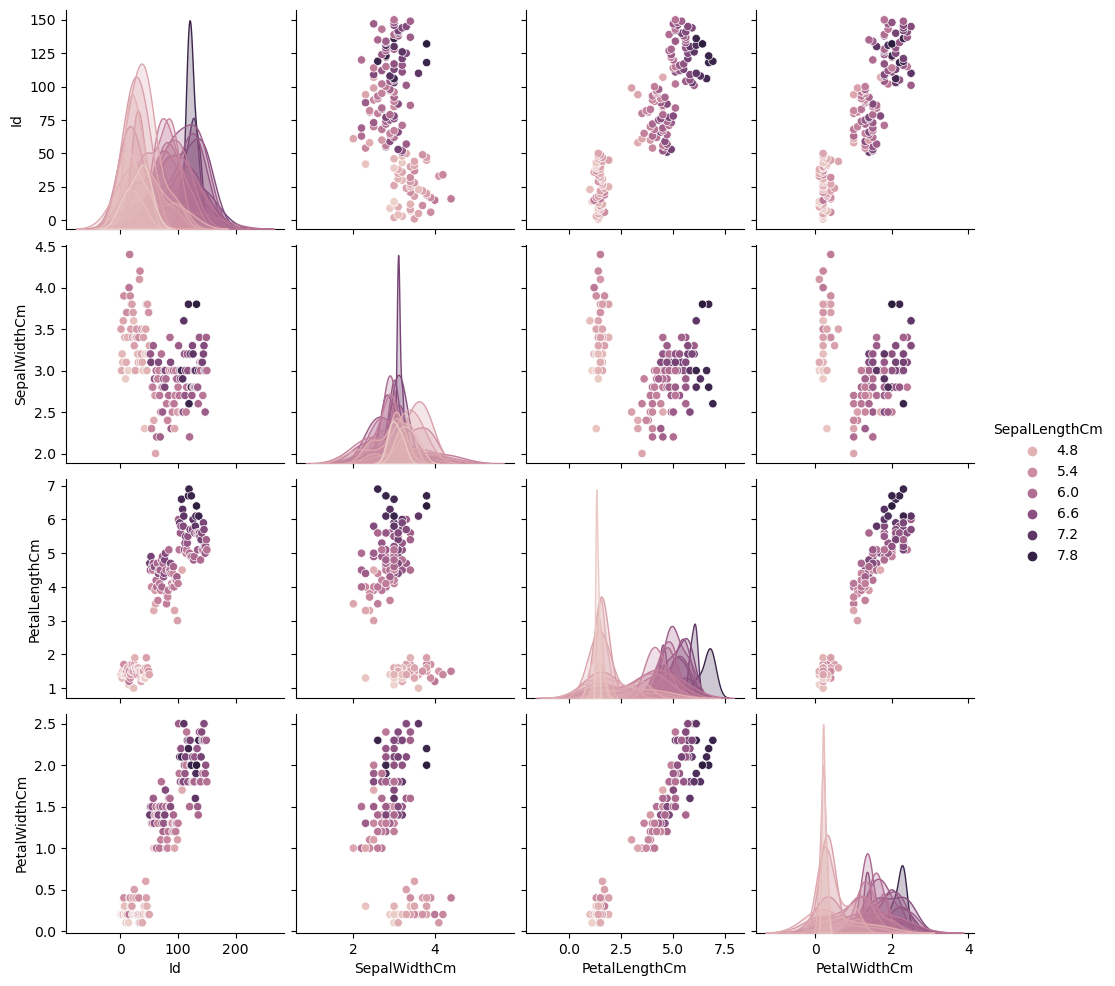

In [11]:
sb.pairplot(sf,hue='SepalLengthCm')

In [12]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2)

In [13]:
container=LinearRegression()
container.fit(a_train,b_train)

LinearRegression()

In [14]:
print(container.score(a_test,b_test)*100)

100.0


In [63]:
container.intercept_

-4.440892098500626e-16

In [64]:
d=container.predict(a_test)

In [65]:
d

array([4.5, 3.9, 6.6, 5.7, 4.5, 6.1, 4.3, 5. , 1.5, 1.7, 1.6, 1.5, 4.5,
       5.7, 3.5, 4.6, 6. , 1.9, 6.3, 1.4, 6.9, 1.4, 4. , 1.5, 4.7, 1. ,
       1.3, 1.4, 4.1, 4.3])

In [93]:
container.score(a_train,b_train)

1.0

In [94]:
z=b_train
l=container.predict(a_train)

In [104]:
print(l)

[5.7 6.7 1.2 4.5 4.2 5.6 6.1 1.7 1.5 5.1 5.  5.2 4.  4.6 5.  1.5 1.5 1.5
 4.9 1.5 6.4 4.8 4.7 5.6 5.5 4.4 5.4 5.5 4.2 3.8 3.3 5.1 1.5 1.4 3.  1.4
 1.4 1.6 4.9 4.5 1.4 1.6 5.9 4.5 5.6 4.4 3.9 3.3 5.3 5.8 5.5 1.6 1.6 4.
 4.4 4.8 5.3 6.  4.8 1.2 4.7 3.7 4.7 4.9 5.6 4.7 5.1 4.9 5.1 1.3 3.5 4.5
 4.9 5.6 4.4 5.9 5.6 1.5 1.3 1.3 1.6 5.1 5.4 5.8 4.2 5.1 5.  5.1 4.1 6.1
 3.9 1.4 1.4 6.7 4.8 4.1 1.5 1.3 1.3 5.2 3.6 1.3 4.5 4.2 1.7 1.4 1.7 4.6
 1.4 5.8 5.1 4.  4.  1.5 1.5 1.9 1.1 1.6 1.4 1.5]
